# Correlation, Pearson, Spearman and Kendall

## Introduction

In this document, we describe the three ways to create a gaussian correlation matrix $R\in\mathbb{R}^{p\times p}$ of a gaussian copula in $p$ dimensions, using Pearson's, Spearman's and Kendall's correlation coefficients.

## The covariance matrix

Let $X\in\mathbb{R}^{p}$ be a vector (it might be non-gaussian). 

Let $K\in\mathbb{R}^{p\times p}$ be the covariance matrix:
$$
K_{ij} = Cov(X_i,X_j) = E[(X_i-E(X_i))(X_j-E(X_j))]
$$
for $i,j=1,...,p$. 
Let $\mu_X\in\mathbb{R}^{p}$ be the vector of the means:
$$
\mu_i = E(X_i)
$$
for $i=1,...,p$. 
Therefore, 
$$
K_{ij} = Cov(X_i,X_j) = E[(X_i-\mu_i)(X_j-\mu_j)]
$$
for $i,j=1,...,p$. 

## The correlation matrix

Let $diag(K)\in\mathbb{R}^{p\times p}$ be the diagonal matrix based on the covariance matrix $K$:
$$
diag(K)_{ij} = 
\left\{ 
\begin{array}{l}
K_{ii} \textrm{ if } i=j, \\
0 \textrm{ otherwise.}
\end{array}
\right.
$$
The definition of the covariance matrix implies that the diagonal of $K$ is made of the variances:
$$
diag(K)_{ii} = V(X_i),
$$
for $i=1,...p$. 

The correlation matrix $R\in\mathbb{R}^{p\times p}$ is:
$$
R = \left(diag(K)^{-\frac{1}{2}}\right) K \left(diag(K)^{-\frac{1}{2}}\right)
$$
for $i,j=1,...,p$. 
This implies that the linear correlation coefficient is 
$$
R_{ij} = Corr(X_i,X_j) = \frac{Cov(X_i,X_j)}{\sqrt{V(X_i)}\sqrt{V(X_j)}}
$$
for $i,j=1,2,\ldots,p$.

## Pearson's correlation coefficient

Let $n$ be the size of a sample of independent realizations of the multidimensionnal vector $X$. 
For $i=1,...,p$, let us denote by $x_i^{(k)}\in\mathbb{R}$ for $k=1,...,n$ these realizations. 

Therefore, Pearson's sample correlation coefficient is:
$$
\rho_n(X_i,X_j) = \frac{\sum_{k=1}^n \left(x_i^{(k)} - \bar{x}_i\right) \left(x_j^{(k)}-\bar{x}_j\right)}{\sqrt{\sum_{k=1}^n \left(x_i^{(k)} - \bar{x}_i\right)^2 \left(x_j^{(k)}-\bar{x}_j\right)^2}},
$$
for $i,j=1,...,p$ 
where $\bar{x}\in\mathbb{R}^{p}$ is the sample mean vector:
$$
\bar{x}_i = \sum_{k=1}^n x_i^{(k)},
$$
for $i=1,...,p$.

## Spearman's correlation coefficient

Spearman's correlation coefficient is Pearson's correlation coefficient applied to the ranks of the sample. 

Let $rg$ be the univariate rank function. 
In other words, let $rg(X_i)\in\mathbb{R}^p$ be the vector of the rank of the i-th component. 

Therefore, Spearman's sample correlation coefficient is:
$$
\rho_n^S(X_i,X_j) = \rho_n\left(rg(X_i),rg(X_j)\right)
$$
for $i,j=1,...,p$.

## Kendall's correlation coefficient

Kendall's $\tau$ is a non-parametric measure of correlation between two variables. 

Let $k=1,...,n$ the indice of a realization within the sample. 
For $i,j=1,...,p$, let $(i,j)$ be a pair of indices of components and 
let $rg\left(X_i^{(k)}\right)$ and $rg\left(X_j^{(k)}\right)$ be the ranks of the components $i$ and $j$. 
The ranks are used to state if the pair $(i,j)$ is concordant or discordant.
* If $rg\left(X_i^{(k)}\right)<rg\left(X_j^{(k)}\right)$, then the pair $(i,j)$ is said to be *concordant*. 
* If $rg\left(X_i^{(k)}\right)\geq rg\left(X_j^{(k)}\right)$, then the pair $(i,j)$ is said to be *discordant*. 

By definition, Kendall's sample correlation coefficient is:
$$
\tau_n(X_i,X_j) = \frac{C_{ij} - D_{ij}}{C_{ij} + D_{ij}}
$$
for $i,j=1,...,p$, where 
* $C_{ij}$ is the number of concordant pairs,
* $D_{ij}$ is the number of discordant pairs.

In the previous equation, the number $C_{ij} + D_{ij}$ is the total number of pairs in the sample:
$$
C_{ij} + D_{ij} = \frac{n(n-1)}{2}
$$
for $i,j=1,...,p$.

## Links with Spearman and Kendall's correlations

If Spearman's correlation matrix $S$ is known, the correlation matrix $R$ can be computed from the equation:
$$
R_{ij} = 2 \sin\left(\frac{ \pi S_{ij}}{6}\right)
$$
for $i,j=1,...,p$.

If Kendall's correlation matrix $T$ is known, the correlation matrix $R$ can be computed from the equation:
$$
T_{ij} = \sin\left(\frac{ \pi \tau_{ij}}{2}\right)
$$
for $i,j=1,...,p$.

## References

- Kruskal, W. 1958. Ordinal Measures of Association. J. Amer. Statist. Assoc. 53 814–861.
- Correlations and Copulas for Decision and Risk Analysis, Robert T. Clemen, Terence Reilly, Management Science/Vol. 45, No. 2, February 1999

In [1]:
import openturns as ot

We create a Spearman's correlation matrix. This matrix has ones on the diagonal.

In [2]:
S = ot.CorrelationMatrix(2)
S[1, 0] = 0.5
S

class=CorrelationMatrix dimension=2 implementation=class=MatrixImplementation name=Unnamed rows=2 columns=2 values=[1,0.5,0.5,1]

Creates the correlation matrix from Spearman correlation.

In [3]:
R = ot.NormalCopula().GetCorrelationFromSpearmanCorrelation(S)
R

class=CorrelationMatrix dimension=2 implementation=class=MatrixImplementation name=Unnamed rows=2 columns=2 values=[1,0.517638,0.517638,1]

Then we can define a multivariate gaussian distibution using this correlation matrix.

In [4]:
mu = [2., -3.]
sigma = [4., 5.]

In [5]:
N = ot.Normal(mu, sigma, R)

It is also possible to define a `ComposedDistribution` based on the gaussian copula.

In [6]:
N0 = ot.Normal(mu[0],sigma[0])
N1 = ot.Normal(mu[1],sigma[1])
marginals = [N0,N1]

In [7]:
copula = ot.NormalCopula(R)
copula

class=NormalCopula name=NormalCopula dimension=2 correlation=class=CorrelationMatrix dimension=2 implementation=class=MatrixImplementation name=Unnamed rows=2 columns=2 values=[1,0.517638,0.517638,1]

In [9]:
M = ot.ComposedDistribution(marginals, copula)

We compare the two methods based on samples.

In [13]:
n = 500 
XN = N.getSample(n)
XM = M.getSample(n)

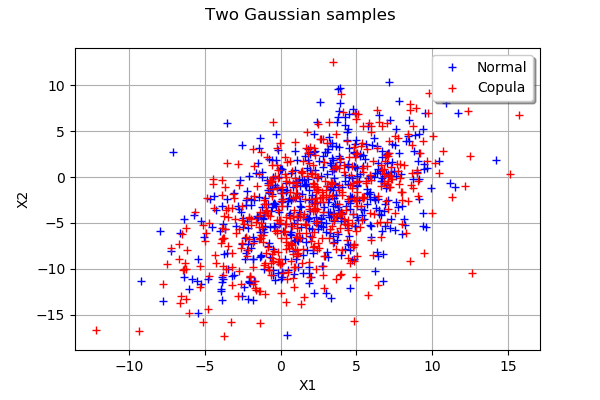

In [20]:
graph = ot.Graph("Two Gaussian samples","X1","X2",True, "topright")
cloudN = ot.Cloud(XN)
cloudN.setLegend("Normal")
cloudM = ot.Cloud(XM)
cloudM.setColor("red")
cloudM.setLegend("Copula")
graph.add(cloudN)
graph.add(cloudM)
graph